In [1]:
# Bài 1: Viết chương trình nạp 1 ảnh và lưu thành 3 ảnh với 3 màu khác nhau
import numpy as np
import os
import cv2

os.makedirs('output_img', exist_ok=True)

img = cv2.imread('../bird.png')

b, g, r = cv2.split(img)

zero = np.zeros_like(b)

red_img = cv2.merge([zero, zero, r])
cv2.imwrite('output_img/red_image.png', red_img)

green_img = cv2.merge([zero, g, zero])
cv2.imwrite('output_img/green_image.png', green_img)

blue_img = cv2.merge([b, zero, zero])
cv2.imwrite('output_img/blue_image.png', blue_img)

print("Đã lưu 3 ảnh với 3 màu khác nhau.")

Đã lưu 3 ảnh với 3 màu khác nhau.


In [2]:
# Bài 2: Viết chương trình nạp một ảnh và hoán đổi giá trị các màu. Lưu các ảnh vào máy

import cv2
import os

os.makedirs('output_swapped_colors', exist_ok=True)

img = cv2.imread('../bird.png') 

rg_img = img.copy()
rg_img[:, :, [1, 2]] = rg_img[:, :, [2, 1]] 
cv2.imwrite('output_swapped_colors/swap_rg.png', rg_img)

gb_img = img.copy()
gb_img[:, :, [0, 1]] = gb_img[:, :, [1, 0]] 
cv2.imwrite('output_swapped_colors/swap_gb.png', gb_img)

br_img = img.copy()
br_img[:, :, [0, 2]] = br_img[:, :, [2, 0]] 
cv2.imwrite('output_swapped_colors/swap_br.png', br_img)

print("Đã hoán đổi màu và lưu ảnh.")

Đã hoán đổi màu và lưu ảnh.


In [3]:
# Bài 3: Viết chương trình nạp một ảnh, chuyển thành hệ màu HSV và lưu 3 ảnh với 3 màu khác nhau.

import cv2
import os
import numpy as np

os.makedirs('output_hsv_images', exist_ok=True)


img = cv2.imread('../bird.png')

# Chuyển sang hệ màu HSV
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Tách 3 kênh: H (Hue), S (Saturation), V (Value)
h, s, v = cv2.split(hsv_img)

# Tạo ảnh hiển thị từng kênh với màu dễ quan sát
# Chuyển từ HSV đơn kênh sang ảnh màu để lưu lại
# Hue ảnh: giữ kênh H, đặt S và V ở giá trị tối đa
hue_img = cv2.cvtColor(cv2.merge([h, 255 * np.ones_like(s), 255 * np.ones_like(v)]), cv2.COLOR_HSV2BGR)
cv2.imwrite('output_hsv_images/hue_channel.png', hue_img)

# Saturation ảnh: giữ kênh S, đặt H và V cố định
sat_img = cv2.cvtColor(cv2.merge([90 * np.ones_like(h), s, 255 * np.ones_like(v)]), cv2.COLOR_HSV2BGR)
cv2.imwrite('output_hsv_images/saturation_channel.png', sat_img)

# Value ảnh: giữ kênh V, đặt H và S cố định
val_img = cv2.cvtColor(cv2.merge([90 * np.ones_like(h), 255 * np.ones_like(s), v]), cv2.COLOR_HSV2BGR)
cv2.imwrite('output_hsv_images/value_channel.png', val_img)

print("Đã lưu 3 ảnh theo kênh H, S, V.")


Đã lưu 3 ảnh theo kênh H, S, V.


In [4]:
# Bài 4: Viết chương trình nạp một ảnh, chuyển sang hệ màu HSV. Lưu ảnh mới với kênh Hnew = 1/3 Hold, Vnew = 3/4 Vold

import cv2
import numpy as np
import os


os.makedirs('output_modified_hsv', exist_ok=True)


img = cv2.imread('../bird.png')

# Chuyển ảnh sang hệ màu HSV
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Tách các kênh H, S, V
h, s, v = cv2.split(hsv_img)

# Áp dụng biến đổi theo đề bài
# H (Hue) trong OpenCV nằm trong khoảng 0-179
# => cần đảm bảo sau khi chia 3 vẫn nằm trong khoảng 0-179
h_new = np.clip((h / 3), 0, 179).astype(np.uint8)
v_new = np.clip((v * 0.75), 0, 255).astype(np.uint8)

# Gộp lại các kênh đã chỉnh sửa với S giữ nguyên
hsv_modified = cv2.merge([h_new, s, v_new])

# Chuyển lại sang ảnh RGB (hoặc BGR) để lưu
result_img = cv2.cvtColor(hsv_modified, cv2.COLOR_HSV2BGR)

# Lưu ảnh kết quả
cv2.imwrite('output_modified_hsv/modified_hsv_image.png', result_img)

print("Đã lưu ảnh với H_new = 1/3 * H và V_new = 3/4 * V.")


Đã lưu ảnh với H_new = 1/3 * H và V_new = 3/4 * V.


In [5]:
# Bài 5: Sử dụng mean filter cho mọi ảnh trong thư mục Exercise và các thư mục con

import cv2
import os


input_root = './'  
output_root = 'Exercise_mean_filtered'
os.makedirs(output_root, exist_ok=True)

kernel_size = (5, 5)

# Duyệt tất cả thư mục và file con với os.walk
for root, dirs, files in os.walk(input_root):
    for filename in files:
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
            input_path = os.path.join(root, filename)
            img = cv2.imread(input_path)

            if img is None:
                print(f"Không đọc được ảnh: {input_path}")
                continue

            # Áp dụng mean filter
            mean_filtered = cv2.blur(img, kernel_size)

            # Tạo đường dẫn thư mục con tương ứng trong thư mục output
            relative_path = os.path.relpath(root, input_root)
            output_dir = os.path.join(output_root, relative_path)
            os.makedirs(output_dir, exist_ok=True)

            # Tạo đường dẫn ảnh đầu ra
            output_path = os.path.join(output_dir, f'mean_{filename}')
            cv2.imwrite(output_path, mean_filtered)

            print(f"Đã xử lý: {input_path} → {output_path}")

print("Đã xử lý xong tất cả ảnh")


Đã xử lý: ./color_randomized_images\randomRGB_bird.png → Exercise_mean_filtered\color_randomized_images\mean_randomRGB_bird.png
Đã xử lý: ./edge_detected_images\bird.png_canny.jpg → Exercise_mean_filtered\edge_detected_images\mean_bird.png_canny.jpg
Đã xử lý: ./edge_detected_images\bird.png_laplacian.jpg → Exercise_mean_filtered\edge_detected_images\mean_bird.png_laplacian.jpg
Đã xử lý: ./edge_detected_images\bird.png_sobel.jpg → Exercise_mean_filtered\edge_detected_images\mean_bird.png_sobel.jpg
Đã xử lý: ./edge_detected_images\bird_canny.jpg → Exercise_mean_filtered\edge_detected_images\mean_bird_canny.jpg
Đã xử lý: ./edge_detected_images\bird_laplacian.jpg → Exercise_mean_filtered\edge_detected_images\mean_bird_laplacian.jpg
Đã xử lý: ./edge_detected_images\bird_sobel.jpg → Exercise_mean_filtered\edge_detected_images\mean_bird_sobel.jpg
Đã xử lý: ./Exercise_mean_filtered\color_randomized_images\mean_randomRGB_bird.png → Exercise_mean_filtered\Exercise_mean_filtered\color_randomized_

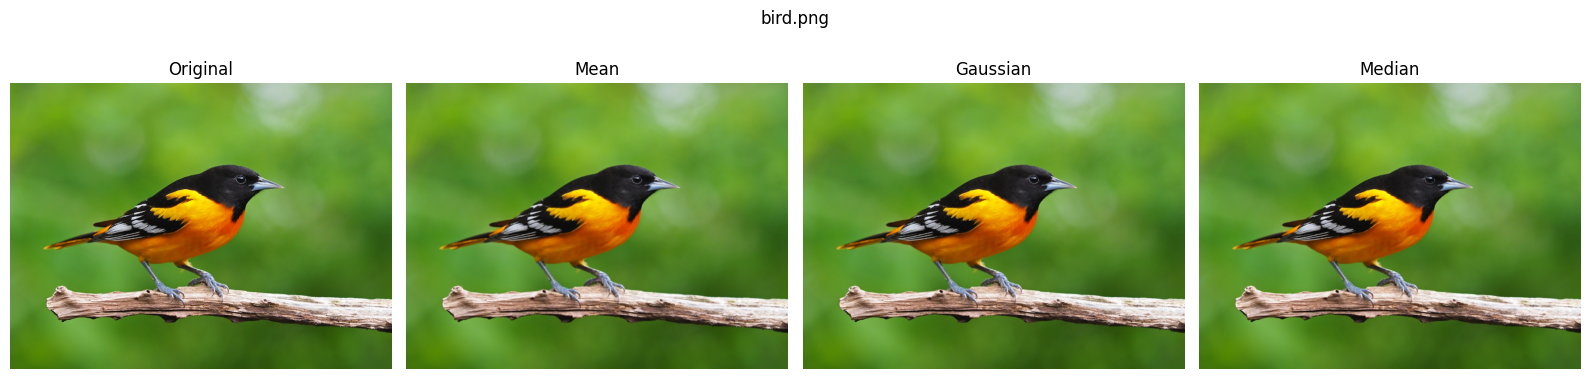

In [6]:
# Bài 6
import cv2
import os
import matplotlib.pyplot as plt
from pathlib import Path

input_root_folder = Path('../')
output_base_folder = Path('.')

kernel_size_tuple = (5, 5)
median_kernel_value = 5

filter_configs = {
    'mean': {
        'folder_name': 'filtered_mean',
        'function': lambda img: cv2.blur(img, kernel_size_tuple),
        'display_title': 'Mean'
    },
    'gaussian': {
        'folder_name': 'filtered_gaussian',
        'function': lambda img: cv2.GaussianBlur(img, kernel_size_tuple, 0),
        'display_title': 'Gaussian'
    },
    'median': {
        'folder_name': 'filtered_median',
        'function': lambda img: cv2.medianBlur(img, median_kernel_value),
        'display_title': 'Median'
    }
}

for config in filter_configs.values():
    (output_base_folder / config['folder_name']).mkdir(parents=True, exist_ok=True)

for filepath in input_root_folder.iterdir():
    if filepath.suffix.lower() in ('.png', '.jpg', '.jpeg', '.bmp'):
        original_img = cv2.imread(str(filepath))

        if original_img is None:
            print(f"Warning: Could not read image {filepath}. Skipping.")
            continue

        processed_images = {}
        for filter_name, config in filter_configs.items():
            filtered_img = config['function'](original_img)
            processed_images[filter_name] = filtered_img
            output_path = output_base_folder / config['folder_name'] / f"{filter_name}_{filepath.name}"
            cv2.imwrite(str(output_path), filtered_img)

        images_to_plot = [('Original', original_img)] + \
                           [(config['display_title'], processed_images[name]) for name, config in filter_configs.items()]

        num_images = len(images_to_plot)
        plt.figure(figsize=(4 * num_images, 4))

        for i, (title, img_data) in enumerate(images_to_plot):
            plt.subplot(1, num_images, i + 1)
            plt.imshow(cv2.cvtColor(img_data, cv2.COLOR_BGR2RGB))
            plt.title(title)
            plt.axis('off')

        plt.suptitle(filepath.name)
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()

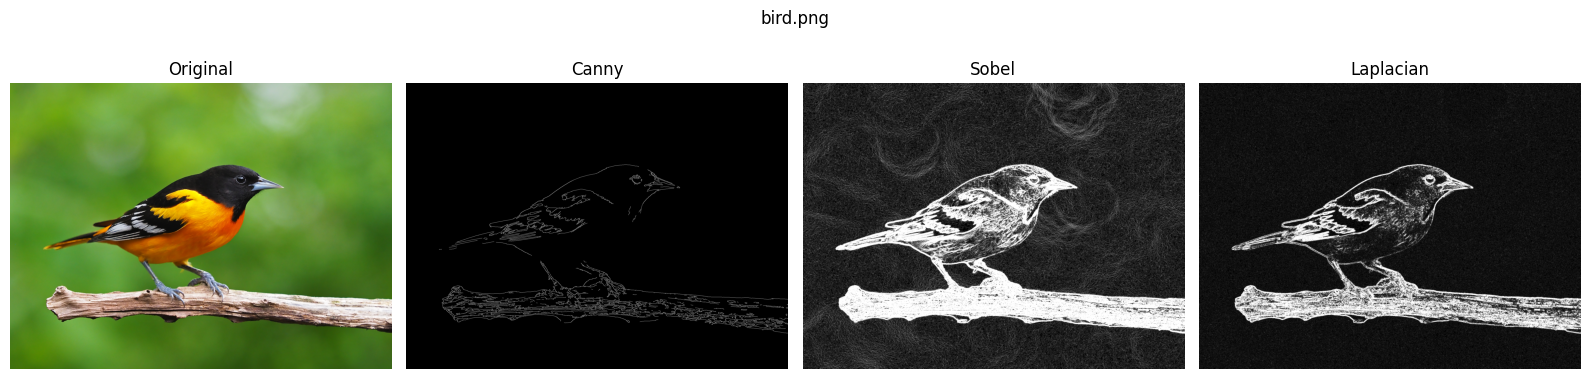

In [7]:
# Bài 7
import cv2
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

input_root_folder = Path('../')
output_base_folder = Path('edge_detected_images')
output_base_folder.mkdir(parents=True, exist_ok=True)

median_blur_ksize = 5
sobel_ksize = 5
canny_threshold1 = 100
canny_threshold2 = 200

def apply_sobel(gray_img):
    sobel_x = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=sobel_ksize)
    sobel_y = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize=sobel_ksize)
    sobel_combined = cv2.magnitude(sobel_x, sobel_y)
    return cv2.convertScaleAbs(sobel_combined)

def apply_laplacian(gray_img):
    laplacian = cv2.Laplacian(gray_img, cv2.CV_64F, ksize=sobel_ksize)
    return cv2.convertScaleAbs(laplacian)

edge_detectors = {
    'canny': {
        'function': lambda gray_img: cv2.Canny(gray_img, canny_threshold1, canny_threshold2),
        'display_title': 'Canny',
        'suffix': '_canny.jpg'
    },
    'sobel': {
        'function': apply_sobel,
        'display_title': 'Sobel',
        'suffix': '_sobel.jpg'
    },
    'laplacian': {
        'function': apply_laplacian,
        'display_title': 'Laplacian',
        'suffix': '_laplacian.jpg'
    }
}

for filepath in input_root_folder.iterdir():
    if filepath.suffix.lower() in ('.png', '.jpg', '.jpeg', '.bmp'):
        original_img = cv2.imread(str(filepath))

        if original_img is None:
            print(f"Warning: Could not read image {filepath}. Skipping.")
            continue

        denoised_img = cv2.medianBlur(original_img, median_blur_ksize)
        gray_img = cv2.cvtColor(denoised_img, cv2.COLOR_BGR2GRAY)

        processed_edges = {}
        for name, config in edge_detectors.items():
            edges = config['function'](gray_img)
            processed_edges[name] = edges
            output_filename = f"{filepath.stem}{config['suffix']}"
            output_path = output_base_folder / output_filename
            cv2.imwrite(str(output_path), edges)

        images_to_plot = [('Original', cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))]
        for name, config in edge_detectors.items():
            images_to_plot.append((config['display_title'], processed_edges[name]))

        num_images = len(images_to_plot)
        plt.figure(figsize=(4 * num_images, 4))

        for i, (title, img_data) in enumerate(images_to_plot):
            plt.subplot(1, num_images, i + 1)
            if len(img_data.shape) == 2: # Grayscale
                plt.imshow(img_data, cmap='gray')
            else: # RGB
                plt.imshow(img_data)
            plt.title(title)
            plt.axis('off')

        plt.suptitle(filepath.name)
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()

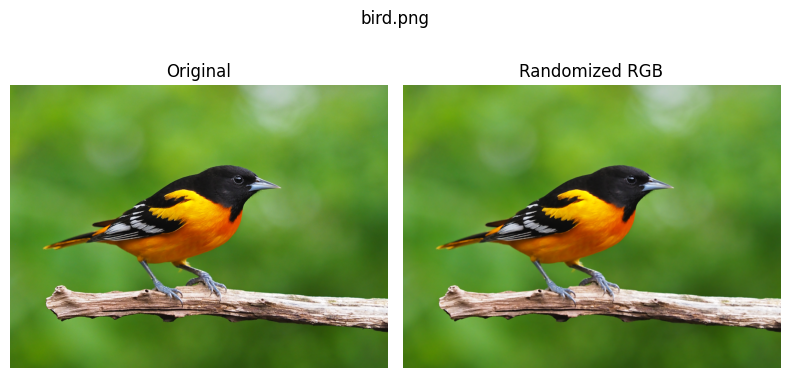

In [8]:
# Bài 8
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

input_root_folder = Path('../')
output_base_folder = Path('color_randomized_images')
output_base_folder.mkdir(parents=True, exist_ok=True)

median_blur_ksize = 5

for filepath in input_root_folder.iterdir():
    if filepath.suffix.lower() in ('.png', '.jpg', '.jpeg', '.bmp'):
        original_img = cv2.imread(str(filepath))

        if original_img is None:
            print(f"Warning: Could not read image {filepath}. Skipping.")
            continue

        denoised_img = cv2.medianBlur(original_img, median_blur_ksize)

        channels = list(cv2.split(denoised_img))
        np.random.shuffle(channels)
        randomized_rgb_img = cv2.merge(channels)

        output_filename = f'randomRGB_{filepath.name}'
        output_path = output_base_folder / output_filename
        cv2.imwrite(str(output_path), randomized_rgb_img)

        plt.figure(figsize=(8, 4))

        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
        plt.title('Original')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(randomized_rgb_img, cv2.COLOR_BGR2RGB))
        plt.title('Randomized RGB')
        plt.axis('off')

        plt.suptitle(filepath.name)
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()

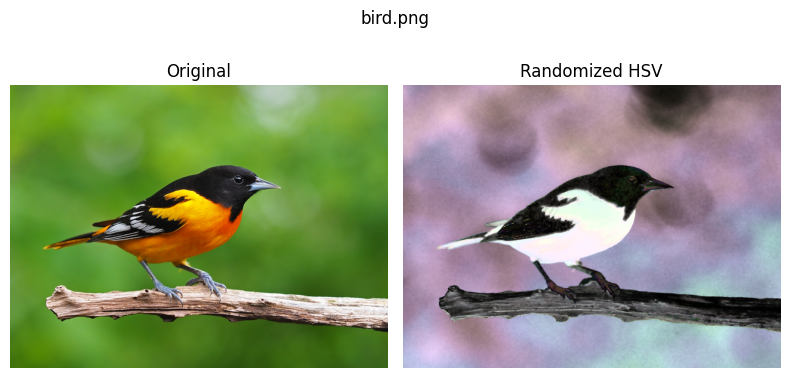

In [9]:
# Bài 9
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

input_root_folder = Path('../')
output_base_folder = Path('hsv_randomized_images')
output_base_folder.mkdir(parents=True, exist_ok=True)

median_blur_ksize = 5

for filepath in input_root_folder.iterdir():
    if filepath.suffix.lower() in ('.png', '.jpg', '.jpeg', '.bmp'):
        original_img = cv2.imread(str(filepath))

        if original_img is None:
            print(f"Warning: Could not read image {filepath}. Skipping.")
            continue

        denoised_img = cv2.medianBlur(original_img, median_blur_ksize)
        hsv_img = cv2.cvtColor(denoised_img, cv2.COLOR_BGR2HSV)

        channels_list = list(cv2.split(hsv_img))
        np.random.shuffle(channels_list)
        shuffled_hsv_img = cv2.merge(channels_list)

        processed_img = cv2.cvtColor(shuffled_hsv_img, cv2.COLOR_HSV2BGR)

        output_filename = f'randomHSV_{filepath.name}'
        output_path = output_base_folder / output_filename
        cv2.imwrite(str(output_path), processed_img)

        plt.figure(figsize=(8, 4))

        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
        plt.title('Original')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(processed_img, cv2.COLOR_BGR2RGB))
        plt.title('Randomized HSV')
        plt.axis('off')

        plt.suptitle(filepath.name)
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()